Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
- Simulate three players: the switcher, the conservative, and the newcomer.
- Record who wins.
- Repeat it many times.
- Which player do you want to be?

**Food for thought**: And what if you had N doors to choose from and the presenter opens M <= N-2 of them? Study how the probability of winning changes as a function of M and N.

In [56]:
import random
import matplotlib.pyplot as plt

In [58]:
def run_trial(N, M):
    # Validate input: M must be <= N-2 (at least one door remains for switching)
    if M > N - 2:
        raise ValueError("M must be less than or equal to N-2.")
    
    # Initialize the doors (from 1 to N)
    doors = np.arange(N) + 1
    # Randomly choose the winning door
    winning_door = random.choice(doors)
    
    # Initial choices for the players
    switcher_choice = random.choice(doors)
    conservative_choice = random.choice(doors)
    
    # Determine which doors the host can open:
    if switcher_choice == winning_door:
        possible_open = [d for d in doors if d != winning_door]
    else:
        possible_open = [d for d in doors if d not in [switcher_choice, winning_door]]
    
    # The host opens M doors (all distinct)
    host_open = random.sample(possible_open, M)
    
    # Remaining doors for the switcher after excluding his initial door and the opened ones
    remaining_elements = [d for d in doors if d not in ([switcher_choice] + host_open)]
    # The switcher then picks randomly among the remaining closed doors
    final_switcher = random.choice(remaining_elements)
    
    switcher_win = (final_switcher == winning_door)
    
    # Conservative player does not switch, so wins only if his initial choice is the winning door
    conservative_win = (conservative_choice == winning_door)
    
    # The newcomer picks from all doors that remain closed (i.e. not opened by the host)
    remaining_doors = [d for d in doors if d not in host_open]
    newcomer_choice = random.choice(remaining_doors)
    newcomer_win = (newcomer_choice == winning_door)
    
    return switcher_win, conservative_win, newcomer_win


In [82]:
def simulate_probability(N, M, trials):
    """
    For given N and M, run a number of trials and return a tuple of win probabilities
    (switcher, conservative, newcomer)
    
    """
    wins_switcher = 0
    wins_conservative = 0
    wins_newcomer = 0
    
    for _ in range(trials):
        sw, cons, new = run_trial(N, M)
        wins_switcher += int(sw)
        wins_conservative += int(cons)
        wins_newcomer += int(new)
    
    return wins_switcher / trials, wins_conservative / trials, wins_newcomer / trials

In [60]:
def plot_probabilities(switcher_win_pct, conservative_win_pct, newcomer_win_pct):
    # Define the categories and corresponding win percentages
    categories = ['Switcher', 'Conservative', 'Newcomer']
    percentages = [switcher_win_pct, conservative_win_pct, newcomer_win_pct]
    
    # Create a bar chart
    plt.figure(figsize=(8, 5))
    bars = plt.bar(categories, percentages, color=['blue', 'orange', 'green'])
    
    # Aggiungi etichette e titolo
    plt.xlabel("Player Type")
    plt.ylabel("Win Percentage (%)")
    plt.title("Monty Hall Simulation - Win Probabilities")
    plt.ylim(0, 100)
    
    # Mostra il valore percentuale sopra ogni barra
    for bar, pct in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{pct:.1f}%", ha='center', va='bottom')
    
    plt.show()

Switcher wins: 66.4%
Conservative wins: 33.0%
Newcomer wins: 49.5%


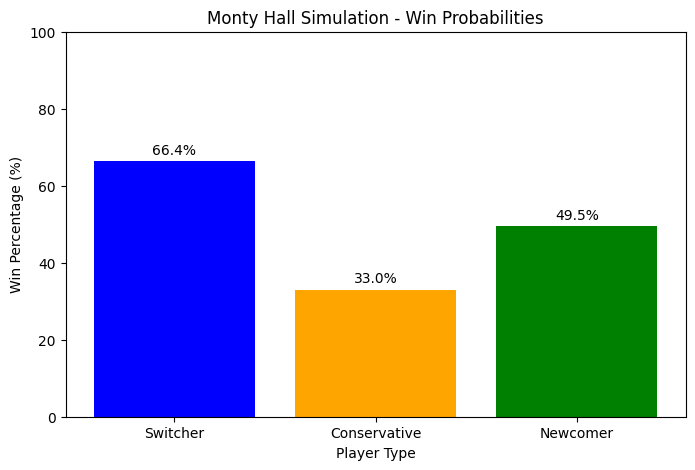

In [90]:
trials = 10000  
N, M = 3, 1  # Classic Monty Hall problem setup with 3 doors and 1 opened by the host

# Run the probability simulation
switcher_win_pct, conservative_win_pct, newcomer_win_pct = simulate_probability(N, M, trials)

# Convert win rates to percentages
win_percentages = [switcher_win_pct * 100, conservative_win_pct * 100, newcomer_win_pct * 100]

# Print the results using formatted strings
print(f"Switcher wins: {win_percentages[0]:.1f}%")
print(f"Conservative wins: {win_percentages[1]:.1f}%")
print(f"Newcomer wins: {win_percentages[2]:.1f}%")

# Plot the probability distribution
plot_probabilities(*win_percentages)


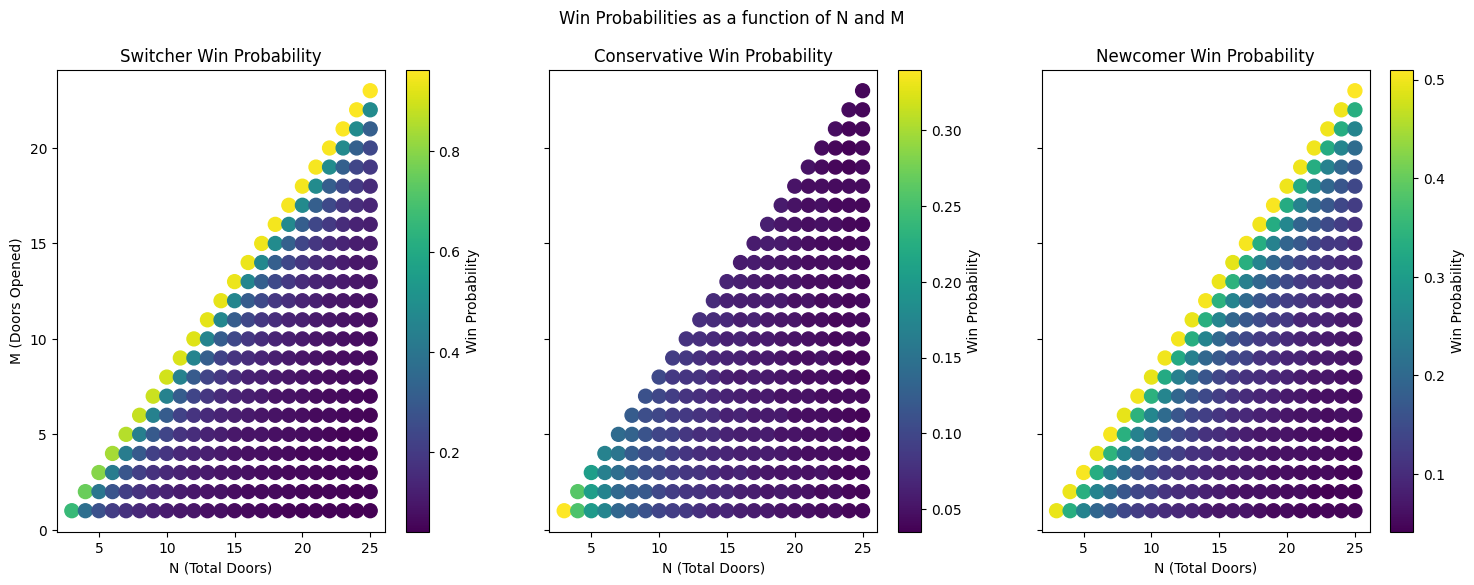

In [91]:
# Imposta il massimo numero di porte
N_max = 25

# Liste per salvare i dati: (N, M, win probability)
data_switcher = []
data_conservative = []
data_newcomer = []

# Varia N da 3 fino a N_max e per ogni N varia M da 1 fino a N-2
for N in range(3, N_max+1):
    for M in range(1, N-1):  # M assume valori da 1 a N-2
        prob_sw, prob_cons, prob_new = simulate_probability(N, M, trials=10000)
        data_switcher.append((N, M, prob_sw))
        data_conservative.append((N, M, prob_cons))
        data_newcomer.append((N, M, prob_new))

# Converte i dati in array NumPy per facilità d'uso
data_switcher = np.array(data_switcher)
data_conservative = np.array(data_conservative)
data_newcomer = np.array(data_newcomer)

# C Crea una figura con 3 subplot per i 3 grafici
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Grafico per lo switcher
sc0 = axs[0].scatter(data_switcher[:,0], data_switcher[:,1], c=data_switcher[:,2], cmap='viridis', s=100)
axs[0].set_title("Switcher Win Probability")
axs[0].set_xlabel("N (Total Doors)")
axs[0].set_ylabel("M (Doors Opened)")
cbar0 = fig.colorbar(sc0, ax=axs[0])
cbar0.set_label("Win Probability")

# Grafico per il conservativo
sc1 = axs[1].scatter(data_conservative[:,0], data_conservative[:,1], c=data_conservative[:,2], cmap='viridis', s=100)
axs[1].set_title("Conservative Win Probability")
axs[1].set_xlabel("N (Total Doors)")
cbar1 = fig.colorbar(sc1, ax=axs[1])
cbar1.set_label("Win Probability")

# Grafico per il newcomer
sc2 = axs[2].scatter(data_newcomer[:,0], data_newcomer[:,1], c=data_newcomer[:,2], cmap='viridis', s=100)
axs[2].set_title("Newcomer Win Probability")
axs[2].set_xlabel("N (Total Doors)")
cbar2 = fig.colorbar(sc2, ax=axs[2])
cbar2.set_label("Win Probability")

# Imposta il titolo generale
plt.suptitle("Win Probabilities as a function of N and M")

# Mostra il grafico
plt.show()
"METTERE UNA SOLA  BARRA DI COLORE, SOLO LA PRIMA"